In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('lstm1.csv')

In [3]:
df.head()

,date,unit,PF,LF
0,1/1/2019,23550,0.9996,1
1,1/2/2019,24400,0.9980,1
2,1/3/2019,32950,0.9919,1
3,1/4/2019,42140,0.9795,1
4,1/5/2019,54990,0.9799,1


In [4]:
df.tail()

,date,unit,PF,LF
31,1/8/2021,46880,0.9996,1
32,1/9/2021,56640,0.9986,1
33,1/10/2021,51330,0.9984,1
34,1/11/2021,50440,0.9992,1
35,1/12/2021,51330,0.9984,1


In [5]:
df1=df.reset_index()['unit']

In [6]:
df1

0     23550
1     24400
2     32950
3     42140
4     54990
5     49440
6     50340
7     54740
8     65110
9     46460
10    55160
11    57280
12    53390
13    54600
14    57520
15    49410
16    44920
17    49210
18    52600
19    45710
20    41360
21    39910
22    31480
23    37140
24    42140
25    38710
26    57460
27    51030
28    41140
29    37900
30    41380
31    46880
32    56640
33    51330
34    50440
35    51330
Name: unit, dtype: int64

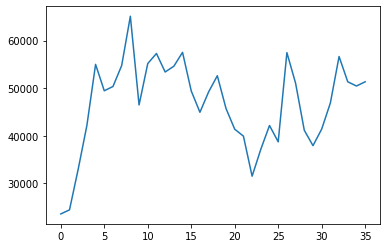

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
df1

0     23550
1     24400
2     32950
3     42140
4     54990
5     49440
6     50340
7     54740
8     65110
9     46460
10    55160
11    57280
12    53390
13    54600
14    57520
15    49410
16    44920
17    49210
18    52600
19    45710
20    41360
21    39910
22    31480
23    37140
24    42140
25    38710
26    57460
27    51030
28    41140
29    37900
30    41380
31    46880
32    56640
33    51330
34    50440
35    51330
Name: unit, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.        ]
 [0.02045236]
 [0.22617902]
 [0.4473051 ]
 [0.75649663]
 [0.62295476]
 [0.6446102 ]
 [0.75048123]
 [1.        ]
 [0.5512512 ]
 [0.7605871 ]
 [0.81159769]
 [0.71799808]
 [0.74711261]
 [0.81737247]
 [0.62223292]
 [0.51419634]
 [0.6174206 ]
 [0.69898941]
 [0.533205  ]
 [0.42853705]
 [0.39364774]
 [0.19080847]
 [0.32699711]
 [0.4473051 ]
 [0.36477382]
 [0.81592878]
 [0.6612127 ]
 [0.4232435 ]
 [0.34528393]
 [0.42901829]
 [0.56135707]
 [0.79619827]
 [0.66843118]
 [0.64701636]
 [0.66843118]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(23, 13)

In [18]:
train_data

array([[0.        ],
       [0.02045236],
       [0.22617902],
       [0.4473051 ],
       [0.75649663],
       [0.62295476],
       [0.6446102 ],
       [0.75048123],
       [1.        ],
       [0.5512512 ],
       [0.7605871 ],
       [0.81159769],
       [0.71799808],
       [0.74711261],
       [0.81737247],
       [0.62223292],
       [0.51419634],
       [0.6174206 ],
       [0.69898941],
       [0.533205  ],
       [0.42853705],
       [0.39364774],
       [0.19080847]])

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-time_step-1):
  a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----9   10 
  dataX.append(a)
  dataY.append(dataset[i + time_step, 0])
 return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(12, 10)
(12,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(2, 10)
(2,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(5,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(5,return_sequences=True))
model.add(LSTM(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 5)             140       
                                                                 
 lstm_1 (LSTM)               (None, 10, 5)             220       
                                                                 
 lstm_2 (LSTM)               (None, 5)                 220       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 586
Trainable params: 586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.2302 - val_loss: 0.2365
Epoch 2/10
1/1 [==============================] - 0s 52ms/step - loss: 0.2208 - val_loss: 0.2272
Epoch 3/10
1/1 [==============================] - 0s 56ms/step - loss: 0.2115 - val_loss: 0.2179
Epoch 4/10
1/1 [==============================] - 0s 50ms/step - loss: 0.2021 - val_loss: 0.2085
Epoch 5/10
1/1 [==============================] - 0s 50ms/step - loss: 0.1927 - val_loss: 0.1990
Epoch 6/10
1/1 [==============================] - 0s 60ms/step - loss: 0.1833 - val_loss: 0.1895
Epoch 7/10
1/1 [==============================] - 0s 51ms/step - loss: 0.1740 - val_loss: 0.1800
Epoch 8/10
1/1 [==============================] - 0s 54ms/step - loss: 0.1647 - val_loss: 0.1705
Epoch 9/10
1/1 [==============================] - 0s 57ms/step - loss: 0.1554 - val_loss: 0.1610
Epoch 10/10
1/1 [==============================] - 0s 54ms/step - loss: 0.1462 - val_loss: 0.1514


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 19ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35959.087431985296

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

34720.99757386542

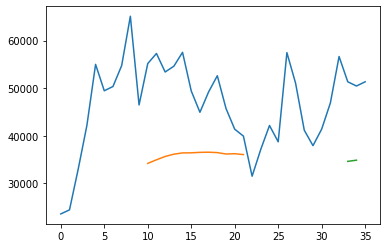

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

13

In [ ]:
x_input=test_data[3:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8159287776708374,
 0.6612127045235804,
 0.4232435033686237,
 0.345283926852743,
 0.4290182868142445,
 0.5613570741097208,
 0.7961982675649663,
 0.6684311838306064,
 0.6470163618864292,
 0.6684311838306064]

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.34528393 0.42901829 0.56135707 0.79619827 0.66843118 0.64701636
 0.66843118 0.28153446 0.2763541  0.27342844]
0 day output [[0.27398577]]
1 day input [0.42901829 0.56135707 0.79619827 0.66843118 0.64701636 0.66843118
 0.28153446 0.2763541  0.27342844 0.27398577]
1 day output [[0.27425462]]
2 day input [0.56135707 0.79619827 0.66843118 0.64701636 0.66843118 0.28153446
 0.2763541  0.27342844 0.27398577 0.27425462]
2 day output [[0.27102932]]
3 day input [0.79619827 0.66843118 0.64701636 0.66843118 0.28153446 0.2763541
 0.27342844 0.27398577 0.27425462 0.27102932]
3 day output [[0.263656]]
4 day input [0.66843118 0.64701636 0.66843118 0.28153446 0.2763541  0.27342844
 0.27398577 0.27425462 0.27102932 0.26365599]
4 day output [[0.2502977]]
5 day input [0.64701636 0.66843118 0.28153446 0.2763541  0.27342844 0.27398577
 0.27425462 0.27102932 0.26365599 0.2502977 ]
5 day output [[0.23957676]]
6 day input [0.66843118 0.28153446 0.2763541  0.27342844 0.27398577 0.27425462
 0.2710

In [ ]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [ ]:
len(df1)

36

In [ ]:
import matplotlib.pyplot as plt

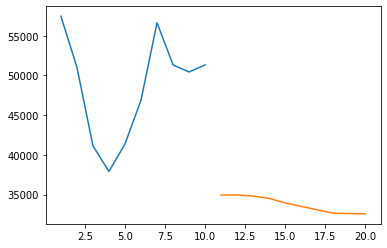

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[26:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

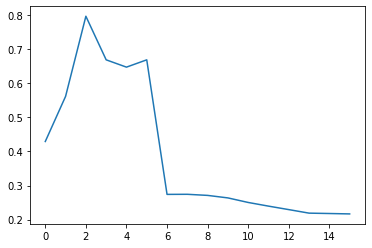

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[30:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

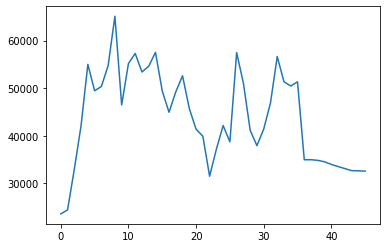

In [ ]:
plt.plot(df3)